In [1]:
import pandas as pd

We hypothesize that the likelihood of achieving a higher finishing position is greatest for drivers who start in the top two (front row) grid positions and maintain the lead after the first lap, especially on circuits with restricted overtaking opportunities, like Monaco or the Hungaroring. Specifically, we expect that starting grid position, first-lap lead status, and circuit type (street vs. permanent) will interact to shape race outcomes: on overtaking-limited circuits, drivers starting in the front row will have a significant advantage in average finishing position, whereas on high-speed circuits with more overtaking zones, the influence of starting position may diminish, making the first-lap lead more important. Additionally, we predict that adverse weather conditions (such as increased rain levels) will further amplify the advantage in finishing position for drivers starting in a top position or leading after the first lap, as challenging conditions reduce overtaking opportunities for those starting further back.

In [2]:
#Explore results
results_df = pd.read_csv('F1Data/results.csv')[['resultId', 'raceId', 'driverId', 'grid', 'position', 'laps']]

results_df


,resultId,raceId,driverId,grid,position,laps
0,1,18,1,1,1,58
1,2,18,2,5,2,58
2,3,18,3,7,3,58
3,4,18,4,11,4,58
4,5,18,5,3,5,58
...,...,...,...,...,...,...
26514,26520,1132,839,18,16,50
26515,26521,1132,815,0,17,50
26516,26522,1132,855,14,18,50
26517,26523,1132,847,1,\N,33


In [3]:
#Explore lap_times
lap_times_df = pd.read_csv('F1Data/lap_times.csv')

lap_times_df

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
575024,1131,858,65,19,1:10.742,70742
575025,1131,858,66,19,1:10.855,70855
575026,1131,858,67,19,1:12.454,72454
575027,1131,858,68,19,1:13.607,73607


## Onto the next; importing races.csv, and circuits.csv, and combining them

In [4]:
# Load races.csv and keep essential columns
races_df = pd.read_csv('F1Data/races.csv')[['raceId', 'year', 'circuitId', 'date', 'time']]

# Display the resulting DataFrame
races_df


,raceId,year,circuitId,date,time
0,1,2009,1,2009-03-29,06:00:00
1,2,2009,2,2009-04-05,09:00:00
2,3,2009,17,2009-04-19,07:00:00
3,4,2009,3,2009-04-26,12:00:00
4,5,2009,4,2009-05-10,12:00:00
...,...,...,...,...,...
1120,1140,2024,32,2024-10-27,20:00:00
1121,1141,2024,18,2024-11-03,17:00:00
1122,1142,2024,80,2024-11-23,06:00:00
1123,1143,2024,78,2024-12-01,17:00:00


In [5]:
# Load circuits.csv and drop unnecessary columns
circuits_df = pd.read_csv('F1Data/circuits.csv').drop(columns=['url', 'country', 'alt','location'])

# Display the resulting DataFrame
circuits_df


,circuitId,circuitRef,name,lat,lng
0,1,albert_park,Albert Park Grand Prix Circuit,-37.84970,144.96800
1,2,sepang,Sepang International Circuit,2.76083,101.73800
2,3,bahrain,Bahrain International Circuit,26.03250,50.51060
3,4,catalunya,Circuit de Barcelona-Catalunya,41.57000,2.26111
4,5,istanbul,Istanbul Park,40.95170,29.40500
...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,37.22700,-8.62670
73,76,mugello,Autodromo Internazionale del Mugello,43.99750,11.37190
74,77,jeddah,Jeddah Corniche Circuit,21.63190,39.10440
75,78,losail,Losail International Circuit,25.49000,51.45420


In [6]:
#merged the two dataframes together
races_circuits_df = pd.merge(races_df, circuits_df, on='circuitId')
races_circuits_df

,raceId,year,circuitId,date,time,circuitRef,name,lat,lng
0,1,2009,1,2009-03-29,06:00:00,albert_park,Albert Park Grand Prix Circuit,-37.8497,144.9680
1,18,2008,1,2008-03-16,04:30:00,albert_park,Albert Park Grand Prix Circuit,-37.8497,144.9680
2,36,2007,1,2007-03-18,03:00:00,albert_park,Albert Park Grand Prix Circuit,-37.8497,144.9680
3,55,2006,1,2006-04-02,14:00:00,albert_park,Albert Park Grand Prix Circuit,-37.8497,144.9680
4,71,2005,1,2005-03-06,14:00:00,albert_park,Albert Park Grand Prix Circuit,-37.8497,144.9680
...,...,...,...,...,...,...,...,...,...
1120,1078,2022,79,2022-05-08,19:30:00,miami,Miami International Autodrome,25.9581,-80.2389
1121,1102,2023,79,2023-05-07,19:30:00,miami,Miami International Autodrome,25.9581,-80.2389
1122,1126,2024,79,2024-05-05,20:00:00,miami,Miami International Autodrome,25.9581,-80.2389
1123,1119,2023,80,2023-11-19,06:00:00,vegas,Las Vegas Strip Street Circuit,36.1147,-115.1730


# NEW SECTION
Trying to answer this part:
We hypothesize that the likelihood of winning a race is highest for drivers who start in the top two (or front row)
grid positions and maintain the lead after the first lap,
especially on circuits with restricted overtaking opportunities,
like Monaco or the Hungaroring.

so i am ignoring weather for now

In [7]:
# Merge results_df with races_circuits_df 
merged_df = pd.merge(lap_times_df, races_circuits_df[['raceId', 'circuitRef', 'circuitId']], on='raceId')

#output
merged_df

,raceId,driverId,lap,position,time,milliseconds,circuitRef,circuitId
0,841,20,1,1,1:38.109,98109,albert_park,1
1,841,20,2,1,1:33.006,93006,albert_park,1
2,841,20,3,1,1:32.713,92713,albert_park,1
3,841,20,4,1,1:32.803,92803,albert_park,1
4,841,20,5,1,1:32.342,92342,albert_park,1
...,...,...,...,...,...,...,...,...
575024,1131,858,65,19,1:10.742,70742,red_bull_ring,70
575025,1131,858,66,19,1:10.855,70855,red_bull_ring,70
575026,1131,858,67,19,1:12.454,72454,red_bull_ring,70
575027,1131,858,68,19,1:13.607,73607,red_bull_ring,70


In [8]:
#ALL them merged together
# so i renamed the positoin to finish_position because this is the final lap and not 1st lap.

results_df = results_df.rename(columns={'position': 'finish_position'})

# Merge the results_df with merged_df on 'raceId' and 'driverId'
merged_df = pd.merge(merged_df, results_df, on=['raceId', 'driverId'])

# Drop the 'laps' column which is from results_df
merged_df = merged_df.drop(columns=['laps'])

# Display the resulting DataFrame
merged_df



,raceId,driverId,lap,position,time,milliseconds,circuitRef,circuitId,resultId,grid,finish_position
0,841,20,1,1,1:38.109,98109,albert_park,1,20779,1,1
1,841,20,2,1,1:33.006,93006,albert_park,1,20779,1,1
2,841,20,3,1,1:32.713,92713,albert_park,1,20779,1,1
3,841,20,4,1,1:32.803,92803,albert_park,1,20779,1,1
4,841,20,5,1,1:32.342,92342,albert_park,1,20779,1,1
...,...,...,...,...,...,...,...,...,...,...,...
575024,1131,858,65,19,1:10.742,70742,red_bull_ring,70,26503,19,19
575025,1131,858,66,19,1:10.855,70855,red_bull_ring,70,26503,19,19
575026,1131,858,67,19,1:12.454,72454,red_bull_ring,70,26503,19,19
575027,1131,858,68,19,1:13.607,73607,red_bull_ring,70,26503,19,19


In [9]:
#Filtering for restricted circuits like monaco and hungagoring
restricted_circuits = ['monaco', 'hungaroring']
restricted_df = merged_df[merged_df['circuitRef'].isin(restricted_circuits)]

#output
restricted_df

,raceId,driverId,lap,position,time,milliseconds,circuitRef,circuitId,resultId,grid,finish_position
6288,846,20,1,1,1:24.839,84839,monaco,6,20897,1,1
6289,846,20,2,1,1:20.269,80269,monaco,6,20897,1,1
6290,846,20,3,1,1:19.811,79811,monaco,6,20897,1,1
6291,846,20,4,1,1:19.485,79485,monaco,6,20897,1,1
6292,846,20,5,1,1:19.537,79537,monaco,6,20897,1,1
...,...,...,...,...,...,...,...,...,...,...,...
571042,1128,855,72,16,1:20.585,80585,monaco,6,26440,18,16
571043,1128,855,73,16,1:15.233,75233,monaco,6,26440,18,16
571044,1128,855,74,16,1:20.473,80473,monaco,6,26440,18,16
571045,1128,855,75,16,1:14.718,74718,monaco,6,26440,18,16


so below i am checking the results for people who start at grid 1 and 2.
I later also made another dataframe to see people who won when they started at grid 1 and 2.

In [10]:
# Filtering for grid position 1,2 (front row), so we can see where their
# finsihing position in the finish_position column
front_row_results = restricted_df[(restricted_df['grid'].isin([1, 2]))]
front_row_results

,raceId,driverId,lap,position,time,milliseconds,circuitRef,circuitId,resultId,grid,finish_position
6288,846,20,1,1,1:24.839,84839,monaco,6,20897,1,1
6289,846,20,2,1,1:20.269,80269,monaco,6,20897,1,1
6290,846,20,3,1,1:19.811,79811,monaco,6,20897,1,1
6291,846,20,4,1,1:19.485,79485,monaco,6,20897,1,1
6292,846,20,5,1,1:19.537,79537,monaco,6,20897,1,1
...,...,...,...,...,...,...,...,...,...,...,...
569965,1128,857,74,2,1:16.356,76356,monaco,6,26426,2,2
569966,1128,857,75,2,1:16.644,76644,monaco,6,26426,2,2
569967,1128,857,76,2,1:16.590,76590,monaco,6,26426,2,2
569968,1128,857,77,2,1:16.734,76734,monaco,6,26426,2,2


In [11]:
# Filtering for grid position 1,2 (front row) AND people who won('finish_position') ; AND  lap 1 AND lap1 position
front_row_winners = restricted_df[(restricted_df['grid'].isin([1, 2])) & (restricted_df['finish_position'] == '1') & (restricted_df['lap'] == 1) & (restricted_df['position'] == 1) ]
front_row_winners.head()

,raceId,driverId,lap,position,time,milliseconds,circuitRef,circuitId,resultId,grid,finish_position
6288,846,20,1,1,1:24.839,84839,monaco,6,20897,1,1
30261,865,17,1,1,1:27.880,87880,monaco,6,21352,1,1
37131,870,1,1,1,1:33.423,93423,hungaroring,11,21472,1,1
55142,885,3,1,1,1:28.220,88220,monaco,6,21822,1,1
60396,890,1,1,1,1:32.425,92425,hungaroring,11,21910,1,1


## Comparing people who were in the front grids vs non front grids

In [12]:
# Front row winners (grid 1 or 2, finish position 1, lap 1, and position 1)
front_row_winners = restricted_df[(restricted_df['grid'].isin([1, 2])) & 
                                  (restricted_df['finish_position'] == '1') & 
                                  (restricted_df['lap'] == 1) & 
                                  (restricted_df['position'] == 1)]

# Non-front row winners (not grid 1 or 2, finish position 1, lap 1, and position 1)
non_front_row_winners = restricted_df[(~restricted_df['grid'].isin([1, 2])) & 
                                      (restricted_df['finish_position'] == '1') & 
                                      (restricted_df['lap'] == 1) & 
                                      (restricted_df['position'] == 1)]


In [13]:
# Display both sets
front_row_winners

,raceId,driverId,lap,position,time,milliseconds,circuitRef,circuitId,resultId,grid,finish_position
6288,846,20,1,1,1:24.839,84839,monaco,6,20897,1,1
30261,865,17,1,1,1:27.880,87880,monaco,6,21352,1,1
37131,870,1,1,1,1:33.423,93423,hungaroring,11,21472,1,1
55142,885,3,1,1,1:28.220,88220,monaco,6,21822,1,1
60396,890,1,1,1,1:32.425,92425,hungaroring,11,21910,1,1
77671,905,3,1,1,1:41.206,101206,monaco,6,22240,1,1
132375,211,30,1,1,1:58.788,118788,monaco,6,4095,2,1
151019,196,57,1,1,1:29.112,89112,monaco,6,3765,1,1
164422,178,30,1,1,1:29.618,89618,monaco,6,3370,2,1
171574,185,57,1,1,1:26.989,86989,hungaroring,11,3524,1,1


In [14]:
non_front_row_winners

,raceId,driverId,lap,position,time,milliseconds,circuitRef,circuitId,resultId,grid,finish_position
101381,936,20,1,1,1:32.868,92868,hungaroring,11,22716,3,1
189250,169,57,1,1,1:26.673,86673,hungaroring,11,3172,3,1


/var/folders/r3/qmn2tszd75q342qvbdj0hp600000gn/T/ipykernel_45171/1076748208.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  front_row_winners['Start'] = 'Front Row (1 or 2)'
/var/folders/r3/qmn2tszd75q342qvbdj0hp600000gn/T/ipykernel_45171/1076748208.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_front_row_winners['Start'] = 'Non-Front Row'


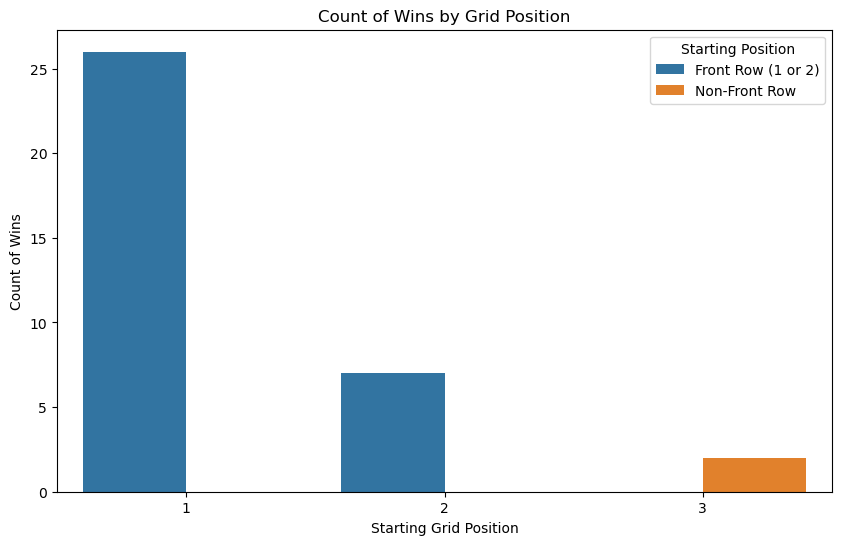

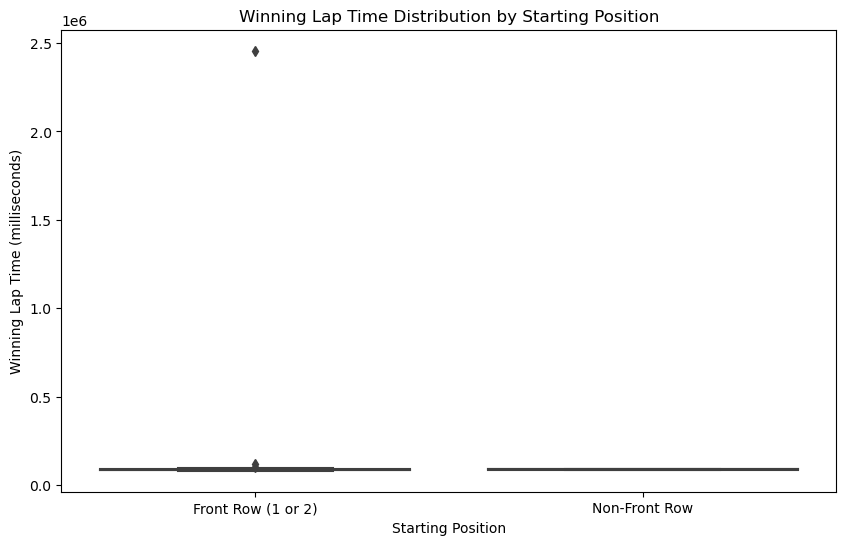

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


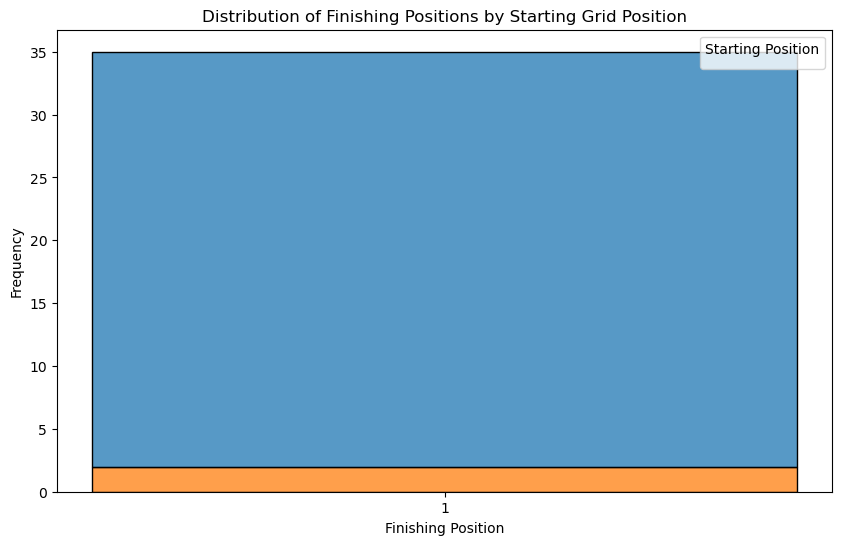

In [ ]:
#chatgpt obviously
import matplotlib.pyplot as plt
import seaborn as sns

# Combine both datasets and add a column to identify front row or not
front_row_winners['Start'] = 'Front Row (1 or 2)'
non_front_row_winners['Start'] = 'Non-Front Row'
combined_df = pd.concat([front_row_winners, non_front_row_winners])

# 1. Bar Plot - Count of Wins by Grid Position
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_df, x='grid', hue='Start')
plt.title('Count of Wins by Grid Position')
plt.xlabel('Starting Grid Position')
plt.ylabel('Count of Wins')
plt.legend(title='Starting Position')
plt.show()

# 2. Box Plot - Winning Times by Grid Position
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df, x='Start', y='milliseconds')
plt.title('Winning Lap Time Distribution by Starting Position')
plt.xlabel('Starting Position')
plt.ylabel('Winning Lap Time (milliseconds)')
plt.show()

# 3. Histogram - Finishing Position for Front Row vs. Non-Front Row
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='finish_position', hue='Start', multiple='stack', bins=10)
plt.title('Distribution of Finishing Positions by Starting Grid Position')
plt.xlabel('Finishing Position')
plt.ylabel('Frequency')
plt.legend(title='Starting Position')
plt.show()
